Symbolic Fit:


0.009786259566332438*x^4 - 0.9246811104471261*x^3 + 34.19082738798291*x^2 - 638.1832576334906*x + 88491.20367483767

First Derivative (Price Change Rate):


0.03914503826532975*x^3 - 2.774043331341378*x^2 + 68.38165477596581*x - 638.1832576334906

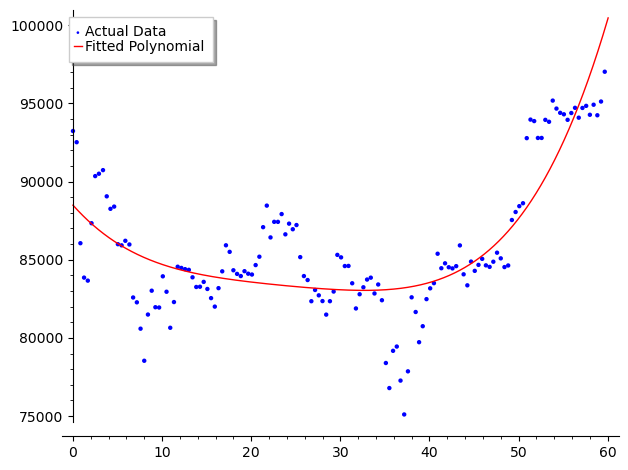

In [7]:
# Step 6: Symbolic Modeling in SageMath
from builtins import int, float
from sage.all import *
import pandas as pd
import matplotlib.pyplot as plt

# --- Load and prepare data ---
df = pd.read_csv('../data/bitcoin_cleaned.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')

# Convert timestamp to numeric day index (x-axis)
df['days'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / (24 * 3600)
x_vals = [float(x) for x in df['days']]
y_vals = [float(y) for y in df['price_usd']]

# Sample every 10th point to keep fit fast and stable
sampled_points = [(x_vals[i], y_vals[i]) for i in range(0, len(x_vals), 10)]

# --- Symbolic polynomial fitting ---
x, a0, a1, a2, a3, a4 = var('x a0 a1 a2 a3 a4')
model = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4

# Use find_fit with explicit variable and parameter definitions
params = find_fit(
    sampled_points,
    model,
    variables=[x],
    parameters=[a0, a1, a2, a3, a4]
)

# Substitute values into model
fitted = model.subs(params)

# Show symbolic model
print("Symbolic Fit:")
show(fitted)

# --- Derivative (rate of price change) ---
df_fitted = diff(fitted, x)
print("First Derivative (Price Change Rate):")
show(df_fitted)

# --- Plot actual vs fitted ---
p1 = list_plot(sampled_points, plotjoined=False, color='blue', legend_label='Actual Data')
p2 = plot(fitted, (x, min(x_vals), max(x_vals)), color='red', legend_label='Fitted Polynomial')
show(p1 + p2)
